In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=1mbTGKWDut-R-VS0X3Ae0G4KFy45vGtTn')

In [ ]:
data.shape

(1999, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  1999 non-null   int64  
 1   Average_Order_Value          1999 non-null   float64
 2   Operating_Hours_Per_Day      1999 non-null   int64  
 3   Number_of_Employees          1999 non-null   int64  
 4   Marketing_Spend_Per_Day      1999 non-null   float64
 5   Location_Foot_Traffic        1999 non-null   int64  
 6   Daily_Revenue                1999 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.4 KB


In [ ]:
data.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,274.400200,6.262526,11.668334,7.949975,252.732396,534.912456,1918.314572
std,129.390393,2.175586,3.438950,3.740788,141.072208,271.728947,975.445026
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,104.600000
25%,164.000000,4.415000,9.000000,5.000000,130.230000,302.000000,1140.755000
50%,275.000000,6.300000,12.000000,8.000000,251.040000,540.000000,1771.630000
75%,386.000000,8.120000,15.000000,11.000000,375.465000,767.000000,2531.350000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


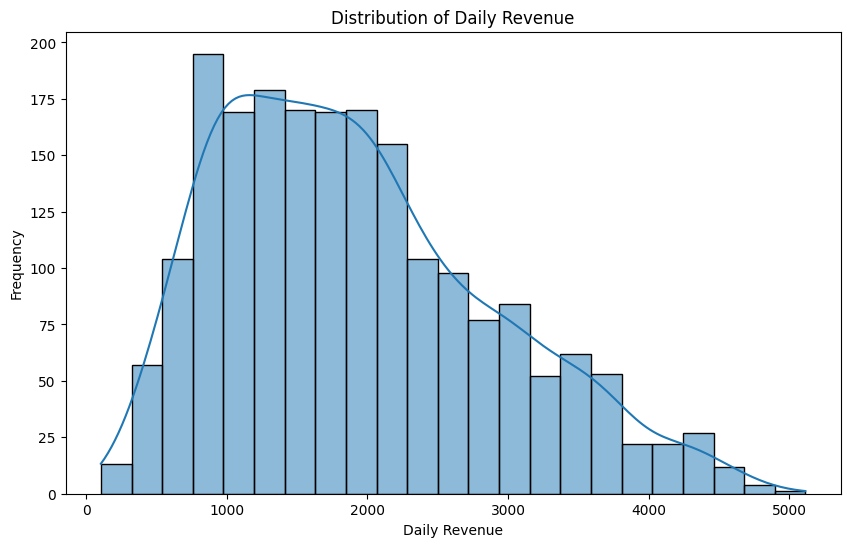

In [ ]:
# Distribution of Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily_Revenue'], kde=True)
plt.title('Distribution of Daily Revenue')
plt.xlabel('Daily Revenue')
plt.ylabel('Frequency')
plt.show()


The revenue is mostly right skewed, stating clearly that most of the daily revenue is betwee 1000 and 2000 dollars.

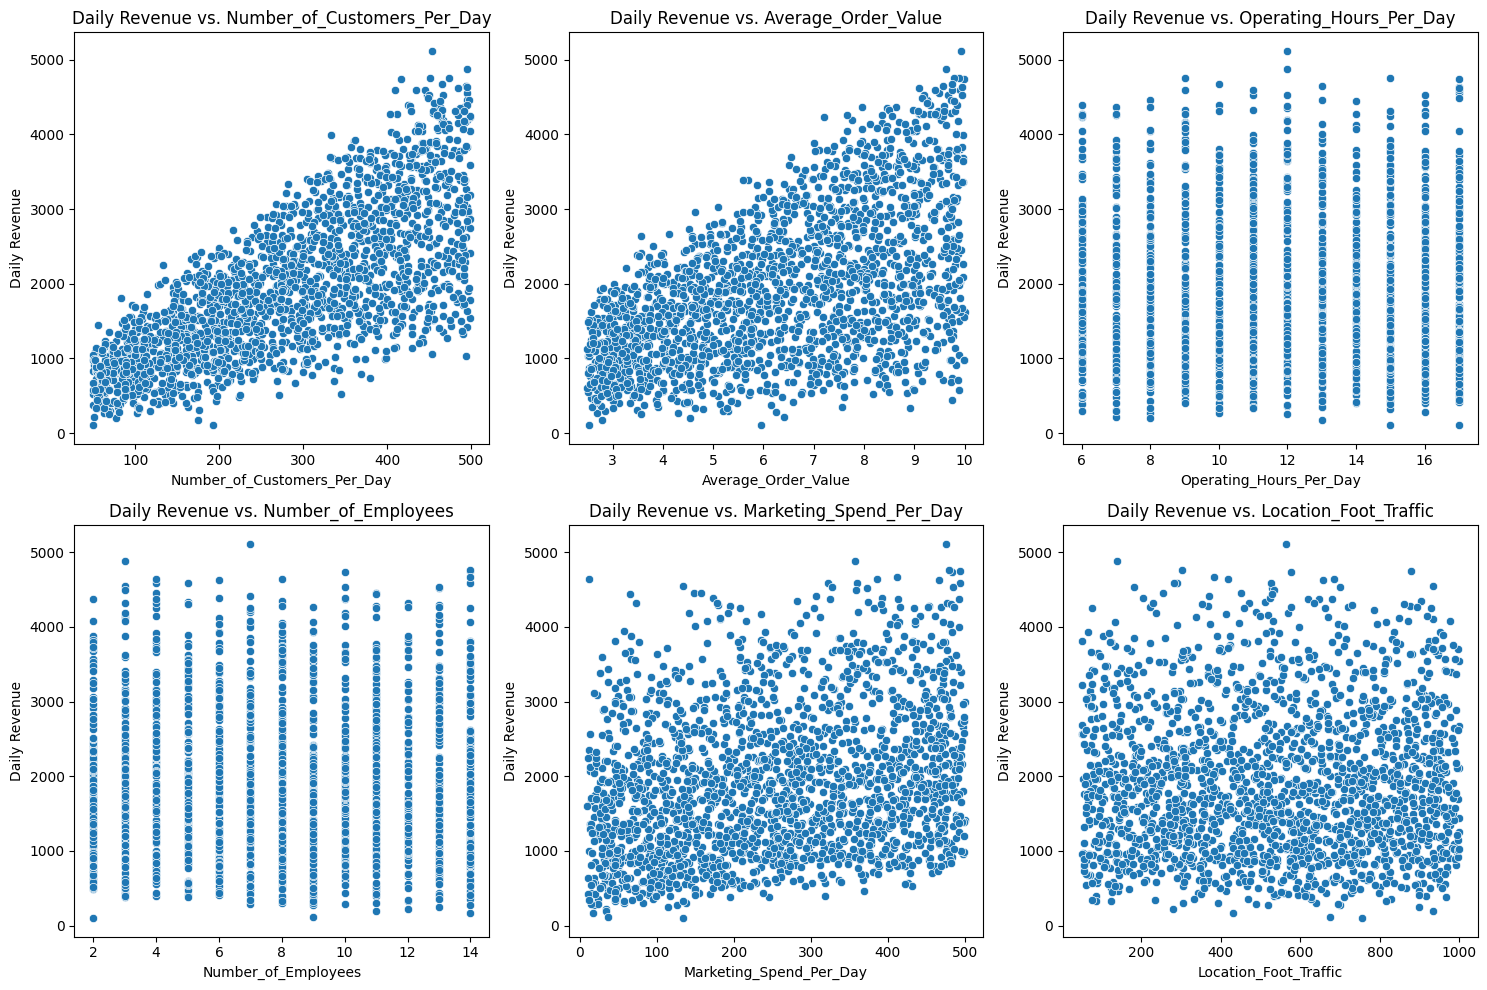

In [ ]:
#Scatter plot for the daily revenue against all other variables in a single sub plotted figure
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through columns (excluding 'Daily_Revenue') and create scatter plots
for i, col in enumerate(data.columns.drop('Daily_Revenue')):
    if i < len(axes):  # Check if we have enough subplots
      sns.scatterplot(x=col, y='Daily_Revenue', data=data, ax=axes[i])
      axes[i].set_title(f'Daily Revenue vs. {col}')
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Daily Revenue')

# Adjust spacing between subplots and display
plt.tight_layout()
plt.show()



A clear correlation between customers per day and revenue (obvious).

What we can work with is creating more columns during feature engineering proces(or now for EDA) regarding the "Revenue per Customer", "Marketing Efficiency" or "Local foot traffic per day and revenue"

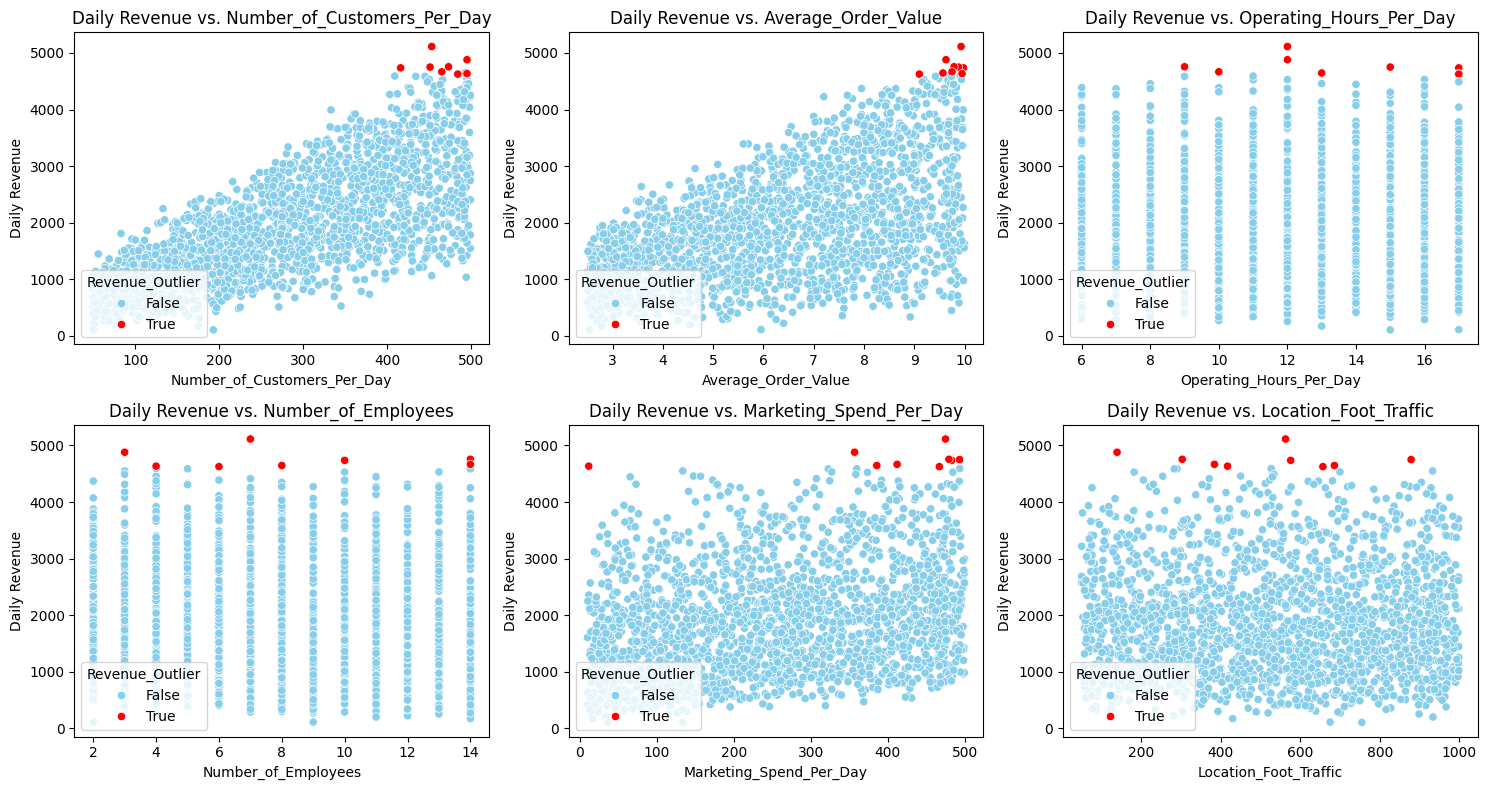

In [ ]:
# Lets look at the behaviour of the outliers

# Step 1: Compute IQR for Daily_Revenue
Q1 = data['Daily_Revenue'].quantile(0.25)
Q3 = data['Daily_Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
#lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
#data['Revenue_Outlier'] = ((data['Daily_Revenue'] < lower_bound) | (data['Daily_Revenue'] > upper_bound))
data['Revenue_Outlier'] = (data['Daily_Revenue'] > upper_bound)

# Step 3: Create scatter plots with outliers highlighted
features = ['Number_of_Customers_Per_Day', 'Average_Order_Value',
            'Operating_Hours_Per_Day', 'Number_of_Employees',
            'Marketing_Spend_Per_Day', 'Location_Foot_Traffic']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(x=data[feature], y=data['Daily_Revenue'], hue=data['Revenue_Outlier'], palette={False: 'skyblue', True: 'red'}, ax=ax)
    ax.set_title(f"Daily Revenue vs. {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Daily Revenue")
    sns.move_legend(ax, "lower left")

plt.tight_layout()
plt.show()

### **1. Operating Hours vs. Revenue**
Outliers are spread across different operating hours.
Operating longer doesn’t directly create extreme revenue days.
Other factors (e.g., more customers or higher Avergae order value) are likely more influential.

### **2.  Number of Employees vs. Revenue**
Revenue outliers don’t consistently align with high employee counts either.
This suggests that adding more employees doesn’t necessarily boost revenue to outlier levels. I think we can limit our employees to save money.

### **3. Marketing Spend vs. Revenue**
High-revenue outliers coincide with higher marketing spend (~400-500 dollars).
However, there are also many non-outlier days with similar marketing spend.
This suggests that marketing alone doesn’t guarantee record-breaking revenue.
Other factors (e.g., foot traffic and order value) likely play a bigger role.
***We can definitely make a mark of controlling the marketing spend.***

### **4. Location Foot Traffic vs. Revenue**
Outliers appear at varying foot traffic levels (not just the highest).
This means that foot traffic alone doesn’t define extreme revenue days.
A combination of high Average Order Value and high customer count is more critical.


In [ ]:
datacopy = data.copy()

# Calculate 'Revenue per Customer'
datacopy['Revenue_per_Customer'] = datacopy['Daily_Revenue'] / datacopy['Number_of_Customers_Per_Day']

# Calculate 'Marketing Efficiency' (example: Revenue per marketing dollar)
datacopy['Marketing_Efficiency'] = datacopy['Daily_Revenue'] / datacopy['Marketing_Spend_Per_Day']

datacopy.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Outlier,Revenue_per_Customer,Marketing_Efficiency
0,152,6.74,14,4,106.62,97,1547.81,False,10.182961,14.517070
1,485,4.50,12,8,57.83,744,2084.68,False,4.298309,36.048418
2,398,9.09,6,6,91.76,636,3118.39,False,7.835151,33.984198
3,320,8.48,17,4,462.63,770,2912.20,False,9.100625,6.294879
4,156,7.44,17,2,412.52,232,1663.42,False,10.662949,4.032338


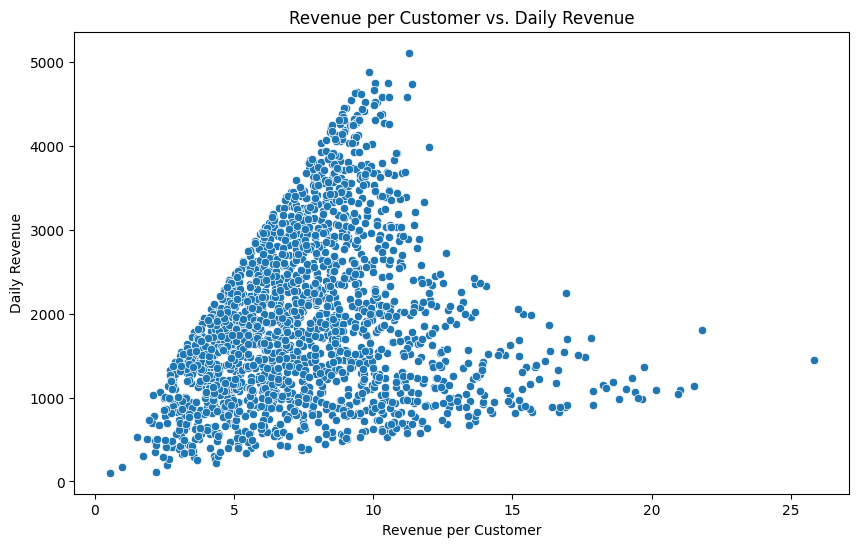

In [ ]:
# Plotting 'Revenue_per_Customer' vs. 'Daily_Revenue'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue_per_Customer', y='Daily_Revenue', data=datacopy)
plt.title('Revenue per Customer vs. Daily Revenue')
plt.xlabel('Revenue per Customer')
plt.ylabel('Daily Revenue')
plt.show()



1. Most high-revenue days occur when Revenue per Customer is between 5 and 10.
2. The shop could create pricing bundles or promotions in this range to encourage more consistent high-value purchases.

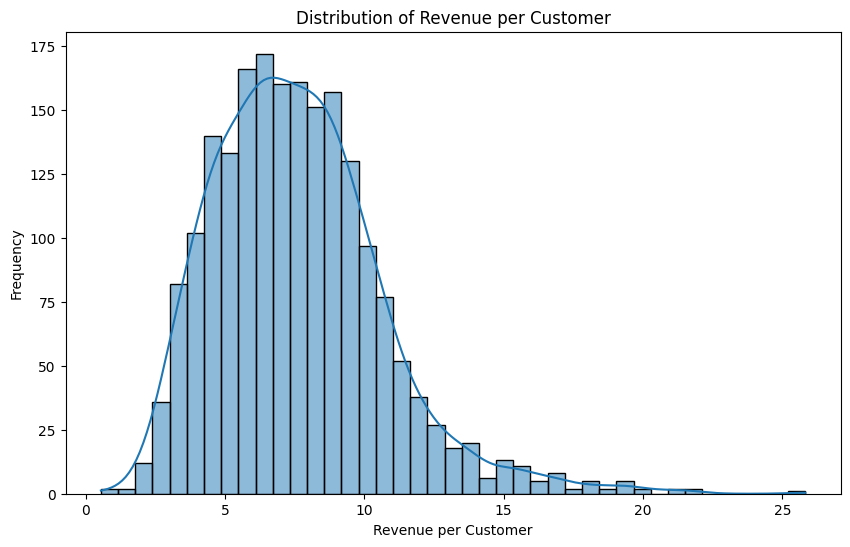

In [ ]:
# prompt: histogram of revenue per customer

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(datacopy['Revenue_per_Customer'], kde=True)
plt.title('Distribution of Revenue per Customer')
plt.xlabel('Revenue per Customer')
plt.ylabel('Frequency')
plt.show()


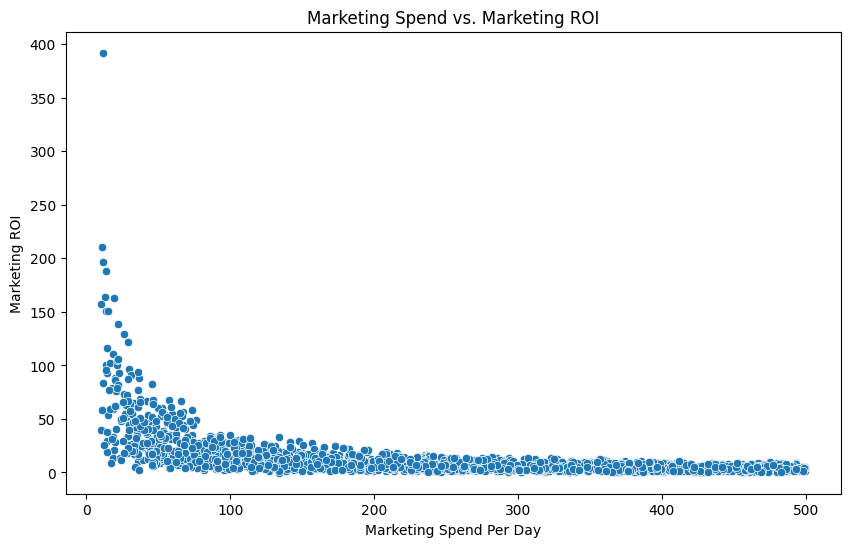

In [ ]:
# How  efficient is the marketing strategy?

# Calculate 'Marketing ROI' (example: Revenue per marketing dollar) - ROI: Return On Investment
datacopy['Marketing_ROI'] = (datacopy['Daily_Revenue'] - datacopy['Marketing_Spend_Per_Day']) / datacopy['Marketing_Spend_Per_Day']


# Scatter plot: Marketing Spend vs. Marketing ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing_Spend_Per_Day', y='Marketing_ROI', data=datacopy)
plt.title('Marketing Spend vs. Marketing ROI')
plt.xlabel('Marketing Spend Per Day')
plt.ylabel('Marketing ROI')
plt.show()


**TAKEAWAY**:

As marketing spend increases, ROI drops sharply.

Beyond 100–150 Dollars per day, most ROI values are below 10, meaning that spending more doesn’t significantly increase revenue.

**We can limit our marketing spend to a maximum of 150 Dollars**